Этот набор данных был получен в ходе ретроспективного исследования когорты пациентов детского возраста, поступивших с болью в живот в детскую больницу St. Hedwig в Регенсбурге, Германия. Для большинства пациентов были получены множественные ультразвуковые изображения брюшной полости в B-режиме, при этом количество проекций варьировалось от 1 до 15. Изображения отображают различные области интереса, такие как правый нижний квадрант живота, аппендикс, кишечник, лимфатические узлы и репродуктивные органы. Наряду с множественными ультразвуковыми изображениями для каждого субъекта, набор данных включает информацию, охватывающую лабораторные анализы, результаты физического обследования, клинические оценки, такие как баллы по шкале Альварадо и детского аппендицита, а также результаты ультразвукового исследования, полученные экспертами. Наконец, субъекты были помечены по трем целевым переменным: диагноз (аппендицит против отсутствия аппендицита), лечение (хирургическое против консервативного) и тяжесть (осложненное против неосложненного или отсутствие аппендицита). Исследование было одобрено Этическим комитетом Регенсбургского университета (№ 18-1063-101, 18-1063_1-101 и 18-1063_2-101) и проводилось в соответствии с действующими руководящими принципами и нормами.

Дополнительная переменная информация
Метки классов

Диагноз: [аппендицит, нет аппендицита], Тяжесть: [осложненное, неосложненное], Лечение: [консервативное, первичное хирургическое, вторичное хирургическое, одномоментная аппендэктомия]

# Цель проекта:

Создать модель предсказания детского аппендицита.

https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis

In [1]:
!pip install tensorflow==2.18.0
!pip uninstall autokeras
!pip install git+https://github.com/keras-team/autokeras.git@master
# Импорт AutoKeras — это библиотека для автоматического построения нейросетей (AutoML)
# AutoKeras сам подбирает архитектуру модели, обучает её и выдаёт наилучший результат
import autokeras as ak

# Импорт функции для загрузки уже обученной Keras-модели из файла (например, .h5)
from tensorflow.keras.models import load_model

# Импорт всего модуля keras из TensorFlow (это основной API для работы с нейросетями)
from tensorflow import keras

# Импорт функции для вычисления весов классов
# compute_class_weight используется при дисбалансе классов (например, если больных меньше, чем здоровых)
# Модель будет "сильнее" наказывать за ошибку на редком классе
from sklearn.utils.class_weight import compute_class_weight

# Установка библиотеки visualkeras (через pip)
# visualkeras используется для красивой визуализации архитектуры нейросети
!pip install visualkeras

# Импорт библиотеки visualkeras для визуального отображения слоёв нейросети (в виде блоков как в архитектурных схемах)
import visualkeras


  Cloning https://github.com/keras-team/autokeras.git (to revision master) to /tmp/pip-req-build-tw60qtx0
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/autokeras.git /tmp/pip-req-build-tw60qtx0
  Resolved https://github.com/keras-team/autokeras.git to commit db78b445ee3aa3aedb19a71d2d1e330cc87f12b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.8 MB/s eta 0:00:00
  Created wheel for autokeras: filename=autokeras-2.1.0.dev0-py3-none-any.whl size=120425 sha256=82c7ada7c1c78595359687b8b658ba8a0a3fceae3c56e9b2eac47c9307627309
  Stored in directory: /tmp/pip-ephem-wheel-cache-dkeanq_y/wheels/54/ff/97/44fdb742ed651a3a6195916c1ed277a32341388e27862131dc
Successfully built autokeras
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 56.1 MB/s eta 0:00:00


In [2]:
# Эта команда используется для установки Python-библиотеки `ucimlrepo`
# Она позволяет загружать датасеты из репозитория UCI Machine Learning Repository
# Восклицательный знак (!) используется в Jupyter-ноутбуках и Google Colab для запуска команд терминала (как в командной строке)
!pip install ucimlrepo


In [3]:
# Устанавливаем библиотеку CatBoost — это фреймворк от компании Яндекс для построения моделей градиентного бустинга
# Подходит для табличных данных, хорошо работает с категориальными признаками без необходимости их кодирования вручную
# ! — используется в Jupyter или Google Colab для выполнения команды как в терминале
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 18.8 MB/s eta 0:00:00


In [4]:
# Импортируем функцию train_test_split из библиотеки scikit-learn
# Она используется для разделения набора данных на обучающую (train) и тестовую (test) выборки
# Это важно, чтобы проверить, насколько хорошо модель работает на новых, невиданных данных
from sklearn.model_selection import train_test_split
# Импортируем функцию `fetch_ucirepo` из библиотеки `ucimlrepo`
# Она позволяет загружать наборы данных из репозитория UCI (одного из самых популярных хранилищ данных для машинного обучения)
from ucimlrepo import fetch_ucirepo
import pandas as pd        # Работа с таблицами (DataFrame)
import numpy as np         # Математика и массивы
import matplotlib.pyplot as plt  # Построение графиков
import seaborn as sns      # Красивые графики поверх matplotlib
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
# Импортируем функцию train_test_split из библиотеки scikit-learn
# Она используется для разделения набора данных на обучающую (train) и тестовую (test) выборки
# Это важно, чтобы проверить, насколько хорошо модель работает на новых, невиданных данных
# Импортируем функцию train_test_split из библиотеки sklearn.model_selection
# Она используется для разделения набора данных на обучающую и тестовую выборки.
# Это важно для проверки того, насколько хорошо модель работает на новых, ещё не виденных данных.
from sklearn.model_selection import train_test_split
# Импортируем класс StandardScaler из библиотеки sklearn.preprocessing
# StandardScaler используется для нормализации (масштабирования) числовых данных:
# каждый столбец будет иметь среднее значение 0 и стандартное отклонение 1.
# Это улучшает работу многих моделей машинного обучения.
from sklearn.preprocessing import StandardScaler
# Импортируем класс LabelEncoder из библиотеки sklearn.preprocessing
# LabelEncoder преобразует категориальные (строковые) значения в числовые коды.
# Например: ['yes', 'no', 'no'] → [1, 0, 0]. Это удобно, потому что модели работают только с числами.
from sklearn.preprocessing import LabelEncoder

# Импортируем библиотеку catboost (CatBoost) — это фреймворк машинного обучения от Яндекса
# Он реализует градиентный бустинг по решающим деревьям и работает прямо с категориальными признаками
# Здесь просто подключается вся библиотека (можно будет использовать, например, catboost.CatBoostClassifier)
# Импорт библиотеки CatBoost — это градиентный бустинг от Яндекса, хорошо работает с табличными данными и категориальными признаками
import catboost

# Импорт функции для визуализации структуры модели Keras (график слоёв нейросети)
from tensorflow.keras.utils import plot_model

# Импорт компонента IPython для отображения изображений (например, вывода plot_model в Jupyter)
from IPython.display import Image, display

# Основной импорт библиотеки TensorFlow (фреймворк для нейросетей и глубокого обучения)
import tensorflow as tf
# Импорт модели случайного леса — популярная модель ансамблевого обучения для классификации и регрессии
from sklearn.ensemble import RandomForestClassifier
# Импорт функций для построения ROC-кривой и вычисления AUC (площадь под ROC-кривой)
from sklearn.metrics import roc_curve, auc

# Импорт SVC (Support Vector Classifier) — модель на основе метода опорных векторов для классификации
from sklearn.svm import SVC

# Импорт конструктора Sequential-моделей Keras — позволяет создавать нейросеть последовательно слой за слоем
from tensorflow.keras import Sequential

# Импорт отдельных слоёв Keras:
from tensorflow.keras.layers import InputLayer   # Входной слой (для задания формы входа)
from tensorflow.keras.layers import Dense        # Полносвязный (нейронный) слой
from tensorflow.keras.layers import Dropout      # Dropout — метод регуляризации (отключение части нейронов)
from tensorflow.keras.layers import ReLU         # Активация ReLU (функция активации с обнулением отрицательных значений)
# Импорт регуляризатора L1L2 из Keras
# L1L2 применяется для добавления штрафа к весам модели во время обучения
# Это помогает предотвратить переобучение (overfitting)

# L1 — добавляет штраф на сумму абсолютных значений весов (разреживание весов — делает некоторые из них равными нулю)
# L2 — добавляет штраф на сумму квадратов весов (сглаживание — удерживает веса малыми)
from tensorflow.keras.regularizers import L1L2

In [ ]:
# Импортируем функцию fetch_ucirepo из библиотеки ucimlrepo
# Эта функция позволяет загружать наборы данных из UCI Machine Learning Repository прямо в виде pandas-таблиц
from ucimlrepo import fetch_ucirepo

# Загружаем датасет по ID = 938
# Это медицинский набор данных под названием "Regensburg Pediatric Appendicitis"
# Он содержит клинические признаки для диагностики аппендицита у детей
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# Извлекаем таблицу признаков (features)
# Это переменные, по которым будем делать предсказание (например, температура, боль, УЗИ-результаты и т.п.)
# Результат — pandas.DataFrame
X = regensburg_pediatric_appendicitis.data.features

# Извлекаем целевую переменную (target), то есть диагноз — есть аппендицит или нет
# Результат — pandas.Series или DataFrame, в зависимости от структуры
y = regensburg_pediatric_appendicitis.data.targets

# Выводим метаданные датасета
# Это информация о наборе данных: его название, источник, описание, авторы, лицензия и т.д.
print(regensburg_pediatric_appendicitis.metadata)

# Выводим информацию о переменных (столбцах) в датасете
# Содержит подробности о каждом признаке: имя, тип (число, категория), допустимые значения и т.д.
print(regensburg_pediatric_appendicitis.variables)


{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [ ]:
# Объединяем таблицы X (признаки) и y (целевые переменные) в один DataFrame
# pd.concat — функция из библиотеки pandas, которая соединяет объекты вдоль указанной оси
# axis=1 означает объединение по столбцам (то есть "вширь", не "вдоль")
# В результате получается одна таблица df, где все признаки и целевые метки находятся вместе
df = pd.concat([X, y], axis=1)


# EDA

In [ ]:
# Выводим общую информацию о DataFrame df
# .info() показывает:
# - количество строк и столбцов
# - названия всех столбцов
# - сколько в каждом столбце непустых значений (non-null)
# - тип данных каждого столбца (int, float, object и т.д.)
# Это помогает понять структуру данных и проверить, есть ли пропуски (NaN)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [ ]:
# Проверяем количество пропущенных значений (NaN) в каждом столбце DataFrame df
# .isna() возвращает таблицу того же размера, где каждое значение — True (если NaN) или False
# .sum() подсчитывает количество True по каждому столбцу, то есть число пропусков
# Это позволяет быстро увидеть, в каких столбцах есть недостающие данные
df.isna().sum()


,0
Age,1
BMI,27
Sex,2
Height,26
Weight,3
Length_of_Stay,4
Alvarado_Score,52
Paedriatic_Appendicitis_Score,52
Appendix_on_US,5
Appendix_Diameter,284


In [ ]:
# Вычисляем процент пропущенных значений в каждом столбце
# df.isna().sum() — считает количество NaN по каждому столбцу
# len(df) — общее число строк (наблюдений) в таблице
# Делим количество NaN на общее число строк и умножаем на 100, чтобы получить процент
null = df.isna().sum() / len(df) * 100

# Преобразуем полученную серию в DataFrame с двумя столбцами:
# 'feature' — название столбца (признака)
# 'null_percentage' — процент пропущенных значений
null = pd.DataFrame({
    'feature': null.index,           # названия признаков
    'null_percentage': null         # процент NaN в каждом
}).sort_values(by='null_percentage', ascending=False).reset_index(drop=True)  # сортируем по убыванию процента пропусков
                                               # сбрасываем старый индекс и создаём новый с нуля

# Показываем первые 30 строк таблицы — признаки с наибольшим количеством пропусков
null.head(30)


,feature,null_percentage
0,Abscess_Location,98.337596
1,Gynecological_Findings,96.675192
2,Conglomerate_of_Bowel_Loops,94.501279
3,Segmented_Neutrophils,93.094629
4,Ileus,92.327366
5,Perfusion,91.943734
6,Enteritis,91.560102
7,Appendicolith,91.176471
8,Coprostasis,90.920716
9,Perforation,89.641944


In [ ]:
# Выводим на экран информацию о переменных (столбцах) датасета
# regensburg_pediatric_appendicitis.variables — это объект, содержащий описание всех признаков (features) и целевых переменных (targets)
# В нём обычно указаны:
# - названия переменных
# - их типы (например, числовой, категориальный)
# - единицы измерения (если есть)
# - возможные значения для категориальных признаков
# Этот вывод помогает понять, как интерпретировать данные и какие типы переменных использовать для анализа
print(regensburg_pediatric_appendicitis.variables)


                                name     role         type demographic  \
0                                Age  Feature   Continuous         Age   
1                                BMI  Feature   Continuous        None   
2                                Sex  Feature  Categorical         Sex   
3                             Height  Feature   Continuous        None   
4                             Weight  Feature      Integer        None   
5                     Length_of_Stay  Feature      Integer        None   
6                         Management   Target  Categorical        None   
7                           Severity   Target  Categorical        None   
8              Diagnosis_Presumptive    Other       Binary        None   
9                          Diagnosis   Target       Binary        None   
10                    Alvarado_Score  Feature      Integer        None   
11     Paedriatic_Appendicitis_Score  Feature      Integer        None   
12                    Appendix_on_US  

Удаляем признаки где процент пропусков больше 65 %

In [ ]:
# Получаем список всех названий столбцов (признаков и целевых переменных) в таблице df
df_cols = df.columns

# Создаём пустой список, куда будем добавлять названия столбцов с большим количеством пропущенных значений
drop_cols = []

# Проходимся по каждому столбцу в таблице
for col in df_cols:
    # Вычисляем процент пропущенных значений в текущем столбце col
    # df[col].isna().sum() — количество NaN в столбце
    # len(df) — общее количество строк
    # Выражение ((df[col].isna().sum()/len(df)) * 100) даёт процент пропусков
    if ((df[col].isna().sum() / len(df)) * 100) > 65:
        # Если процент пропусков больше 65%, добавляем название столбца в список drop_cols
        drop_cols.append(col)

# Выводим список всех столбцов, в которых больше 65% пропущенных значений
drop_cols


['Segmented_Neutrophils',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Pathological_Lymph_Nodes',
 'Lymph_Nodes_Location',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings']

In [ ]:
len(drop_cols)

18

In [ ]:
# Удаляем из DataFrame df все столбцы, названия которых содержатся в списке drop_cols
# drop() — функция, которая удаляет указанные строки или столбцы
# drop_cols — список названий столбцов, которые нужно удалить (те, где было более 65% пропусков)
# axis=1 означает, что мы удаляем именно столбцы (а не строки, которые соответствовали бы axis=0)
df = df.drop(drop_cols, axis=1)

# Снова выводим информацию о DataFrame df
# .info() показывает:
# - сколько осталось строк и столбцов
# - названия и типы оставшихся переменных
# - сколько непустых значений в каждом столбце
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [ ]:
# Подсчитываем количество вхождений каждого уникального значения в столбце 'Diagnosis'
# Это помогает понять, сколько наблюдений (строк) относится к каждой категории диагноза
# Например, сколько пациентов с аппендицитом, без него, и т.д.
unique_diagnosis=df.Diagnosis.value_counts()
unique_diagnosis

,count
Diagnosis,
appendicitis,463
no appendicitis,317


Заполним пропуски в диаметре аппендикса 0 если человек был здоров, если же болен - то средним значением.

Все остальные пропуски заполняем средним соответствующим своей группе по таргету - если это числовой, модой тоже по такому принципу - если это категориальный.

In [ ]:
# Фильтруем строки таблицы df, оставляя только те, где значение в столбце 'Diagnosis' равно 'no appendicitis'
# query("Diagnosis == 'no appendicitis'") — это удобный способ фильтрации строк по условию
# В результате получаем подтаблицу только с пациентами без аппендицита
# Из этой подтаблицы выбираем столбец 'Appendix_Diameter' — диаметр аппендикса

# .describe() — вычисляет базовую статистику для числовых данных:
# - count: количество непустых значений
# - mean: среднее значение
# - std: стандартное отклонение
# - min: минимум
# - 25%, 50%, 75%: квартильные значения
# - max: максимум

df.query("Diagnosis == 'no appendicitis'")['Appendix_Diameter'].describe()


,Appendix_Diameter
count,127.000000
mean,5.037008
std,1.171541
min,2.700000
25%,4.000000
50%,5.000000
75%,5.500000
max,9.500000


Убираем напрямую коррелирующий признаки - диаметр аппендицита и PAS

In [ ]:
# Удаляем два столбца из DataFrame df: 'Appendix_Diameter' и 'Paedriatic_Appendicitis_Score'
# Это может быть нужно, например, если ты больше не хочешь использовать эти признаки в анализе или модели
# drop() — функция для удаления
# axis=1 означает, что удаляем по столбцам (а не по строкам)

df = df.drop(['Appendix_Diameter', 'Paedriatic_Appendicitis_Score'], axis=1)


In [ ]:
# Выбираем все числовые столбцы из таблицы df.
# Метод select_dtypes ищет признаки с типами данных 'float' и 'int', то есть вещественные и целочисленные значения.
# Эти признаки сохраняются в переменную num_cols (например: температура, уровень лейкоцитов и т.д.)
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()

# Для всех числовых признаков в таблице:
# Заполняем пропущенные значения (NaN) с помощью медианы по каждому столбцу.
# .fillna(...) заменяет пустые ячейки
# .median() вычисляет середину значений (в отличие от среднего арифметического, медиана устойчива к выбросам — например, экстремальным значениям)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Выбираем все категориальные признаки из таблицы df, у которых тип данных 'object' (строки).
# Это могут быть, например, 'Пол', 'Наличие боли', 'Результат УЗИ' и т.д.
# Удаляем из этого списка целевой признак 'Diagnosis', так как он используется как метка (ответ), а не входной признак.
# .to_list() — преобразует список названий колонок из формата pandas.Index в обычный список Python
cat_cols = df.select_dtypes(include='object').columns.drop('Diagnosis').to_list()

# Для каждого категориального признака (например, 'Пол', 'Симптомы' и т.п.):
for col in cat_cols:
    # Заполняем пропущенные значения (NaN) наиболее часто встречающимся значением в этом столбце (так называемой модой).
    # .mode()[0] — возвращает первое наиболее часто встречающееся значение
    # Это позволяет не терять строки данных, а аккуратно вставить самое вероятное значение.
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
# Сохраняем обработанный dataset
df.to_csv("/content/appendicitis_cleaned.csv", index=False)

In [ ]:
print(df.columns)

Index(['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay',
       'Alvarado_Score', 'Appendix_on_US', 'Migratory_Pain',
       'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
       'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature',
       'WBC_Count', 'Neutrophil_Percentage', 'Neutrophilia', 'RBC_Count',
       'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine',
       'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool',
       'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness',
       'US_Performed', 'Free_Fluids', 'Management', 'Severity', 'Diagnosis'],
      dtype='object')


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
# Разделяем данные на обучающую и тестовую выборки

# df.drop('Diagnosis', axis=1) — удаляем столбец 'Diagnosis' из таблицы признаков, т.е. оставляем только X (входные признаки)
# df['Diagnosis'] — это целевая переменная (y), которую модель должна предсказывать
# test_size=0.2 — 20% данных пойдут в тестовую выборку, 80% в обучающую
# random_state=42 — фиксируем случайность для воспроизводимости (чтобы при повторном запуске деление было тем же)

X= df.drop('Diagnosis', axis=1)
Y=df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X,  # признаки
    Y,               # целевая переменная
    test_size=0.2,
    stratify= Y,
    random_state=42
)


# Catboost

# Заполнение пропусков

Заполнить пропуски наиболее релеватным путем, аргументировать это
Таргетом оставляем признак - болен аппендицитом или нет.

# Делаем модель на основании CatBoost

In [ ]:
# Создаём классификатор CatBoost

# CatBoostClassifier — это модель градиентного бустинга для задач классификации
# Пока модель создана с настройками по умолчанию, без обучения
model_catboost = catboost.CatBoostClassifier()

In [ ]:
# Инициализируем глобальные переменные
best_model = None          # сюда запишется лучшая модель
best_f1_score = -1         # стартовое значение F1 (наименьшее возможное)
name_model = None          # сюда запишется имя модели


In [ ]:
# Обучаем модель CatBoostClassifier на обучающей выборке
# Заменяем NaN в категориальных признаках на строку 'missing'
# X_train — обучающие признаки (таблица без Diagnosis)
# y_train — обучающие ответы (столбец Diagnosis)
# cat_features=cat_cols — указываем список категориальных признаков
# Это позволяет CatBoost обрабатывать строковые признаки напрямую без предварительного кодирования (например, one-hot)

def learn_model (model=model_catboost):
    history=model.fit(X_train, y_train, cat_features=cat_cols)
    y_predict=model.predict(X_test)

    return history, y_predict, model



Сравниваем все модели классификации по метрике F1 score

In [ ]:
def calculate_mecrics(y_predict, name='catboost'):
    # Функция для расчёта и отображения метрик качества модели
    # y_predict — предсказанные моделью метки классов
    # name — имя модели (по умолчанию 'catboost'), используется для идентификации

    print('\n\n\n METRICS')  # Визуальный разделитель

    # Accuracy — доля правильно предсказанных меток (общая точность)
    print('Accuracy: ', accuracy_score(y_test, y_predict))

    # F1 Score — взвешенное среднее между точностью и полнотой
    # average='weighted' — учитывает дисбаланс классов (вес пропорционален числу объектов)
    f1_score_calc = f1_score(y_test, y_predict, average='weighted')
    print('F1 Score: ', f1_score_calc)

    # Precision — точность (доля истинных положительных среди всех предсказанных положительных)
    print("Precision:", precision_score(y_test, y_predict, average='weighted'))

    # Recall — полнота (доля правильно найденных положительных среди всех настоящих положительных)
    print("Recall:", recall_score(y_test, y_predict, average='weighted'))

    # Вывод матрицы ошибок (confusion matrix) — показывает, как модель путает классы
    print("\nConfusion Matrix:")

    plt.figure(figsize=(5,5))  # Размер графика
    sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues')
    # Создаём тепловую карту: fmt='d' — формат целых чисел, cmap='Blues' — цветовая схема
    plt.title('Матрица ошибок')         # Заголовок
    plt.ylabel('True label')            # Подпись по оси Y — настоящие классы
    plt.xlabel('Predicted label')       # Подпись по оси X — предсказанные классы
    plt.show();                         # Показываем график

    # Classification report — подробная таблица с precision, recall, f1-score по каждому классу
    print("\nClassification Report:")
    print(classification_report(y_test, y_predict))

    # Обновление глобальных переменных для выбора лучшей модели
    global best_model, name_model, best_f1_score  # Глобальные переменные
    if f1_score_calc > best_f1_score:
        best_model = model                # Сохраняем текущую модель
        best_f1_score = f1_score_calc     # Сохраняем лучший f1
        name_model = name                 # Сохраняем имя модели


In [ ]:
history, y_predict, model=learn_model(model=model_catboost)

Learning rate set to 0.008429
0:	learn: 0.6871455	total: 50.7ms	remaining: 50.7s
1:	learn: 0.6747371	total: 53.2ms	remaining: 26.5s
2:	learn: 0.6646117	total: 56.9ms	remaining: 18.9s
3:	learn: 0.6537696	total: 60.3ms	remaining: 15s
4:	learn: 0.6432837	total: 63.7ms	remaining: 12.7s
5:	learn: 0.6320599	total: 67ms	remaining: 11.1s
6:	learn: 0.6223137	total: 70ms	remaining: 9.94s
7:	learn: 0.6128850	total: 73.1ms	remaining: 9.07s
8:	learn: 0.6035186	total: 76.6ms	remaining: 8.44s
9:	learn: 0.5938125	total: 78.6ms	remaining: 7.79s
10:	learn: 0.5842791	total: 81.9ms	remaining: 7.36s
11:	learn: 0.5755661	total: 85ms	remaining: 7s
12:	learn: 0.5660705	total: 88.1ms	remaining: 6.68s
13:	learn: 0.5580742	total: 91ms	remaining: 6.41s
14:	learn: 0.5504982	total: 93.9ms	remaining: 6.16s
15:	learn: 0.5432955	total: 97.1ms	remaining: 5.97s
16:	learn: 0.5352901	total: 100ms	remaining: 5.78s
17:	learn: 0.5281323	total: 103ms	remaining: 5.63s
18:	learn: 0.5213859	total: 106ms	remaining: 5.47s
19:	lear

In [ ]:
history.best_score_

{'learn': {'Logloss': 0.120232747782695}}




 METRICS
Accuracy:  0.8789808917197452
F1 Score:  0.8784891315337174
Precision: 0.8786643781977654
Recall: 0.8789808917197452

Confusion Matrix:


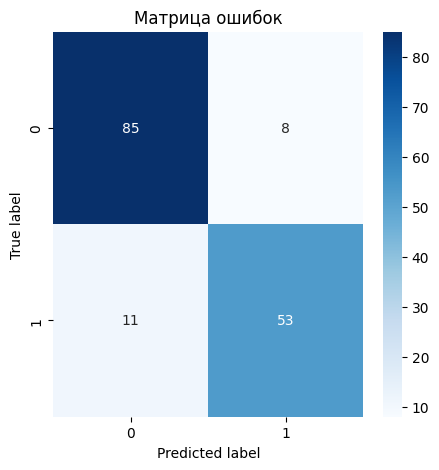


Classification Report:
                 precision    recall  f1-score   support

   appendicitis       0.89      0.91      0.90        93
no appendicitis       0.87      0.83      0.85        64

       accuracy                           0.88       157
      macro avg       0.88      0.87      0.87       157
   weighted avg       0.88      0.88      0.88       157



In [ ]:
calculate_mecrics(y_predict=y_predict, name='catboost')

# Спроектируем модель сети с помощью AutoKeras

In [ ]:
print(name_model)

catboost


In [ ]:
# Копируем исходные обучающую и тестовую выборки признаков, чтобы не изменять оригинальные данные
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Создаём словарь, куда будут сохраняться энкодеры (LabelEncoder) для каждого категориального столбца
# Это нужно, чтобы при необходимости потом можно было восстановить оригинальные текстовые значения
label_encoders = {}

# Перебираем все категориальные признаки (список cat_cols заранее определён)
for col in cat_cols:
    le = LabelEncoder()  # создаём объект кодировщика для одного столбца
    # fit_transform на обучающей выборке: обучает энкодер на уникальных строках и преобразует их в числа
    X_train_encoded[col] = le.fit_transform(X_train[col])
    # transform на тестовой выборке: применяет уже обученный энкодер (fit не делается!)
    X_test_encoded[col] = le.transform(X_test[col])
    # сохраняем энкодер для этого столбца, если потребуется обратное преобразование
    label_encoders[col] = le

# Кодируем целевую переменную (например, 'Diagnosis') — преобразуем текстовые метки классов в числа
target_encoder = LabelEncoder()
# Преобразуем обучающие метки
y_train_encoded = target_encoder.fit_transform(y_train)
# Преобразуем тестовые метки с тем же энкодером
y_test_encoded = target_encoder.transform(y_test)

# Создаём объект StandardScaler — это инструмент для нормализации числовых признаков
# Он приводит все значения к единому масштабу: среднее = 0, стандартное отклонение = 1
scaler = StandardScaler()

# Применяем нормализацию только к X (признакам), а не к y (классам)
# Обучаем scaler на обучающих данных и сразу применяем к ним трансформацию
scaled_X_train = scaler.fit_transform(X_train_encoded)

# Применяем ту же трансформацию (без обучения) к тестовой выборке
scaled_X_test = scaler.transform(X_test_encoded)

# Классы уже представлены как числа — их не нужно масштабировать.
# Просто присваиваем в итоговые переменные для совместимости с обучением моделей
scaled_y_train = y_train_encoded
scaled_y_test = y_test_encoded


In [ ]:
# Перед обучением нейронной сети сбалансируем классы

# Вычисляем веса для каждого класса в целевой переменной y (в данном случае scaled_y_train)
# Параметры:
# 'balanced' — стратегия: чем реже класс встречается, тем больший вес ему будет присвоен
# classes=np.unique(scaled_y_train) — список всех уникальных меток классов
# y=scaled_y_train — обучающая целевая переменная, в которой считаем частоту классов
weights = compute_class_weight(
    class_weight='balanced',                 # балансировка по частоте
    classes=np.unique(scaled_y_train),       # список уникальных классов
    y=scaled_y_train                         # массив меток, по которым считаем веса
)

# Преобразуем массив weights в словарь, где:
# ключи — это номера классов (0, 1, 2, ...)
# значения — это соответствующие веса
# Такой словарь удобно передавать в модели, которые поддерживают class_weight (например, в Keras, sklearn)
class_weights_dict = {i: weights[i] for i in range(len(weights))}

In [ ]:
# Создаём AutoKeras классификатор (автоматический подбор нейросетевой архитектуры)
# AutoKeras — это библиотека, которая автоматически подбирает лучшую модель машинного обучения или нейросети

# Сохраняем лучшую модель, если метрика val_loss улучшилась
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor='val_loss',          # следим за значением метрики val_loss на валидации
    mode='min',                  # чем меньше метрика — тем лучше
    filepath="autokeras_model_best.keras",  # куда сохранять файл
    save_best_only=True          # сохранять только, если модель стала лучше
)

clf = ak.AutoModel(
    inputs=ak.Input(),  # Универсальный входной блок, AutoKeras сам определит размерность входа
    outputs=ak.ClassificationHead(),  # Выходной слой — классификация (подходит для задач, где нужно предсказывать класс)
    max_trials=30,      # AutoKeras попробует 10 разных моделей с разной архитектурой и параметрами
    overwrite=False,      # Перезаписать результаты предыдущего поиска, если они были
)

# Обучаем автоматически подобранную модель
model_NN = clf.fit(
    x=scaled_X_train,                 # Признаки обучающей выборки
    y=np.array(scaled_y_train),      # Целевые метки обучающей выборки (переведены в массив NumPy)
    verbose=2,                        # Уровень подробности вывода (2 — печатается инфо по эпохам)
    batch_size=32,
    epochs=20,                        # Количество эпох обучения для каждой пробуемой модели
    validation_data=(scaled_X_test,  # Валидационная выборка (X и y) для проверки качества
                     np.array(scaled_y_test)),
    class_weight=class_weights_dict,  # Веса классов, чтобы сбалансировать обучение (если классы представлены неравномерно)
    callbacks=[model_checkpoint]
)

# Экспорт финальной (лучшей найденной) модели в формате Keras
NN_keras_model = clf.export_model()


Trial 30 Complete [00h 00m 07s]
val_loss: 0.35949477553367615

Best val_loss So Far: 0.2952934503555298
Total elapsed time: 00h 03m 31s
Epoch 1/20
20/20 - 3s - 143ms/step - accuracy: 0.5504 - loss: 0.7054 - val_accuracy: 0.6688 - val_loss: 0.6106
Epoch 2/20
20/20 - 0s - 7ms/step - accuracy: 0.7040 - loss: 0.5636 - val_accuracy: 0.7452 - val_loss: 0.5332
Epoch 3/20
20/20 - 0s - 7ms/step - accuracy: 0.7584 - loss: 0.4990 - val_accuracy: 0.7898 - val_loss: 0.4837
Epoch 4/20
20/20 - 0s - 7ms/step - accuracy: 0.7856 - loss: 0.4542 - val_accuracy: 0.7771 - val_loss: 0.4518
Epoch 5/20
20/20 - 0s - 7ms/step - accuracy: 0.8080 - loss: 0.4128 - val_accuracy: 0.7834 - val_loss: 0.4240
Epoch 6/20
20/20 - 0s - 7ms/step - accuracy: 0.8192 - loss: 0.3898 - val_accuracy: 0.7898 - val_loss: 0.4034
Epoch 7/20
20/20 - 0s - 7ms/step - accuracy: 0.8336 - loss: 0.3641 - val_accuracy: 0.8025 - val_loss: 0.3874
Epoch 8/20
20/20 - 0s - 7ms/step - accuracy: 0.8432 - loss: 0.3494 - val_accuracy: 0.8025 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_keras_model = tf.keras.models.load_model("autokeras_model_best.keras", compile=False)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step



 METRICS
Accuracy:  0.8152866242038217
F1 Score:  0.8162073904188983
Precision: 0.8187902285105275
Recall: 0.8152866242038217

Confusion Matrix:


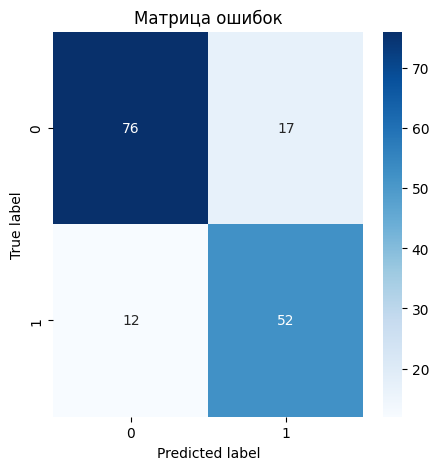


Classification Report:
                 precision    recall  f1-score   support

   appendicitis       0.86      0.82      0.84        93
no appendicitis       0.75      0.81      0.78        64

       accuracy                           0.82       157
      macro avg       0.81      0.81      0.81       157
   weighted avg       0.82      0.82      0.82       157



In [ ]:
pred_NN=best_keras_model.predict(scaled_X_test)
pred_NN_classes=np.where(pred_NN > 0.5, unique_diagnosis.index[1], unique_diagnosis.index[0])
calculate_mecrics(y_predict=pred_NN_classes, name='AutoKeras')

Топология сети AutoKeras


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head_1           │ (None, 1)              │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

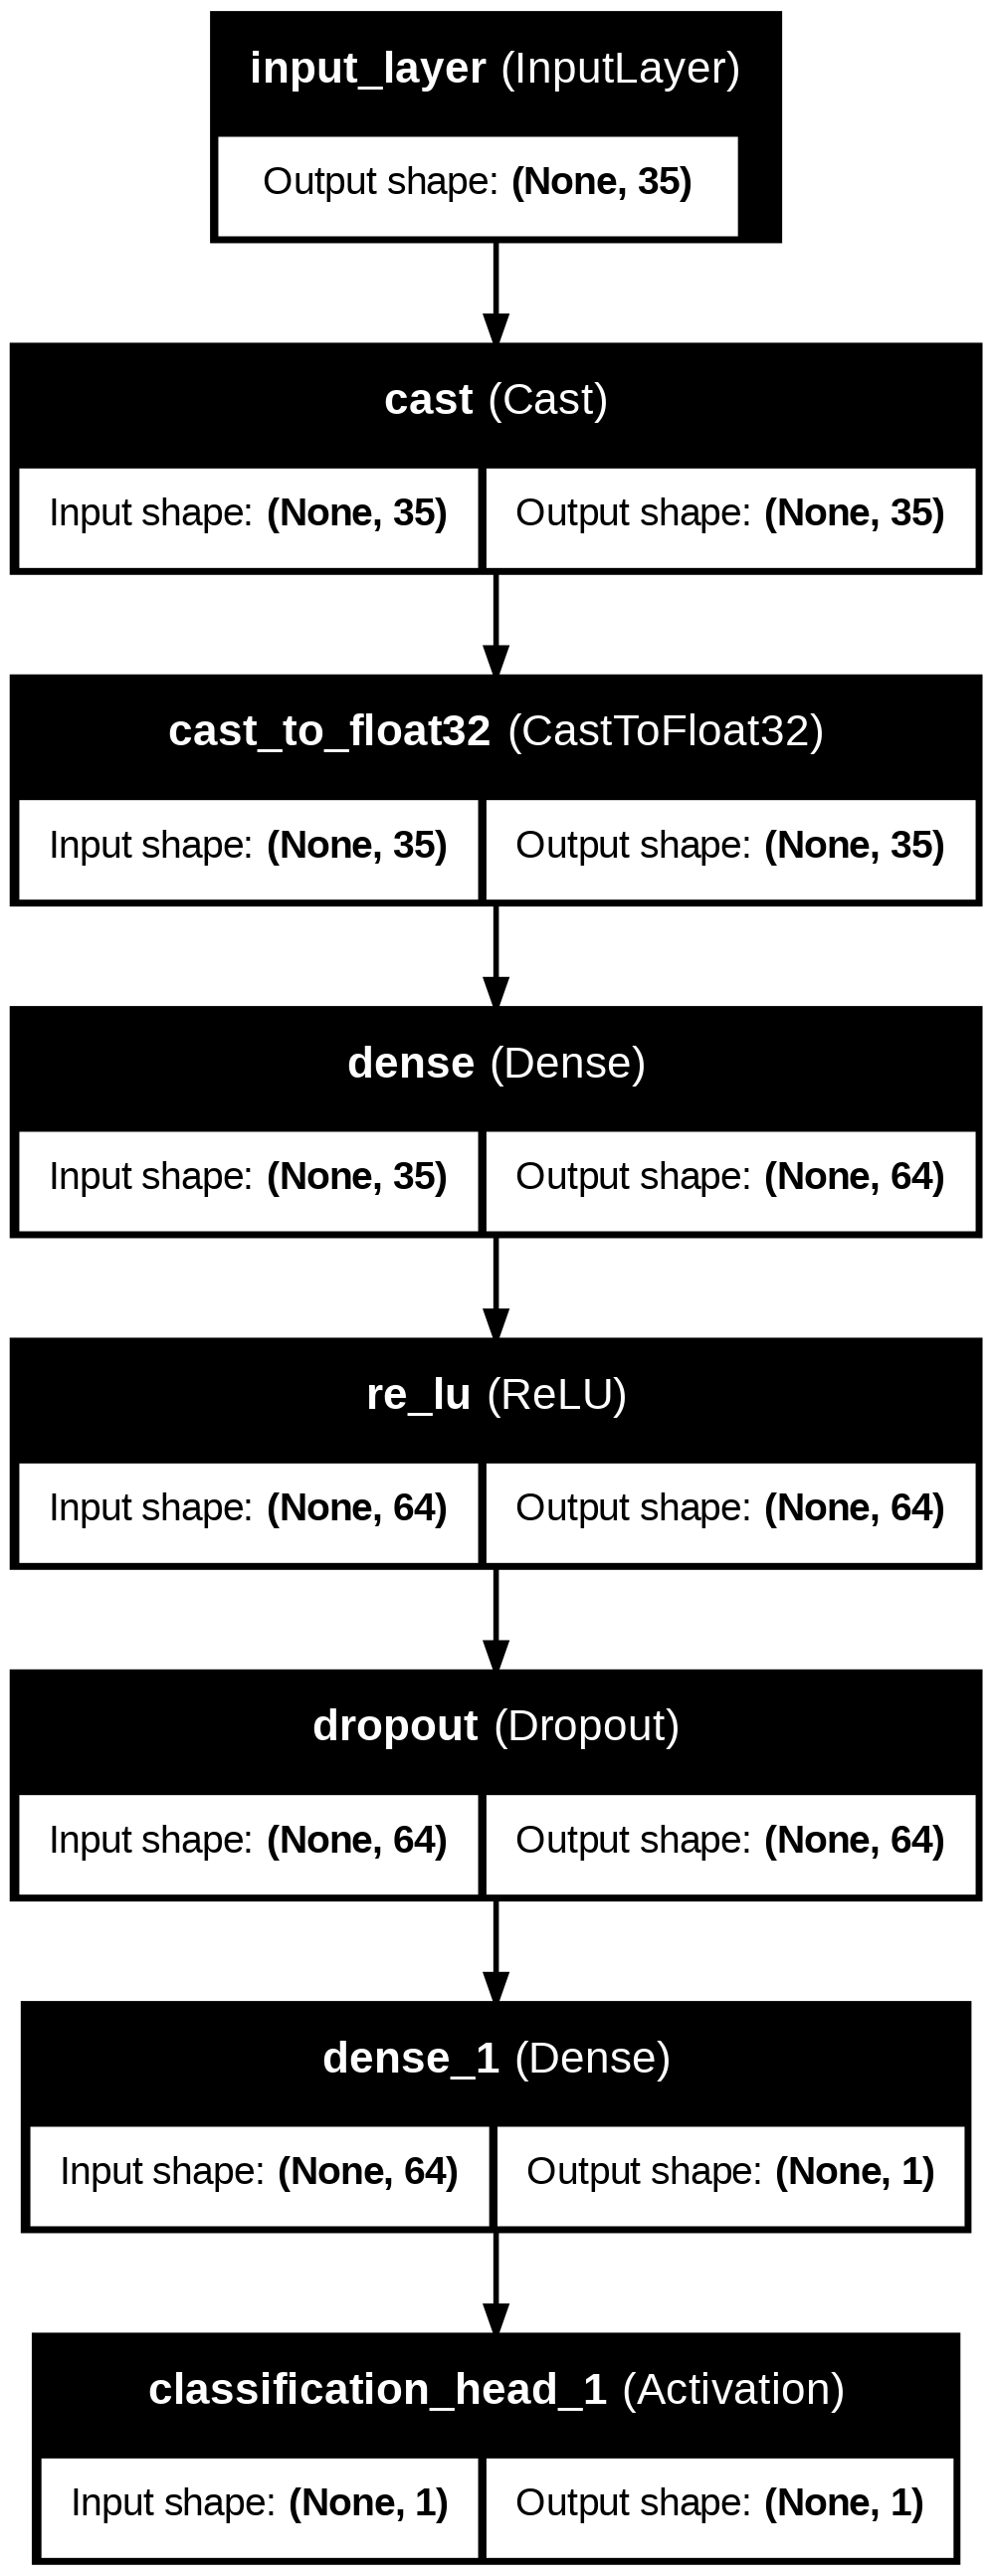

In [ ]:
# Функция отображения архитектуры (топологии) нейронной сети
def show_topology(model_network, name):
        # Выводим в консоль текстовое описание модели с помощью метода .summary()
        # Показываются: название каждого слоя, количество параметров, размер выходного тензора
        print(f'Топология сети {name}')
        model_network.summary()  # Вывод информации о слоях модели в консоль

        # Строим визуальную схему модели и сохраняем её в файл PNG
        # - to_file: имя PNG-файла
        # - show_shapes=True: отображать размеры входов и выходов слоёв
        # - show_layer_names=True: показывать названия слоёв на схеме
        plot_model(model_network, to_file=f'{name}_model_topology.png', show_shapes=True, show_layer_names=True)

        # Отображаем PNG-файл с архитектурой модели прямо в Jupyter/Colab-ячейке
        # Image загружает изображение по имени файла
        display(Image(filename=f'{name}_model_topology.png'))


show_topology(NN_keras_model, 'AutoKeras')

In [ ]:
print(name_model)

catboost





 METRICS
Accuracy:  0.8152866242038217
F1 Score:  0.8162073904188983
Precision: 0.8187902285105275
Recall: 0.8152866242038217

Confusion Matrix:


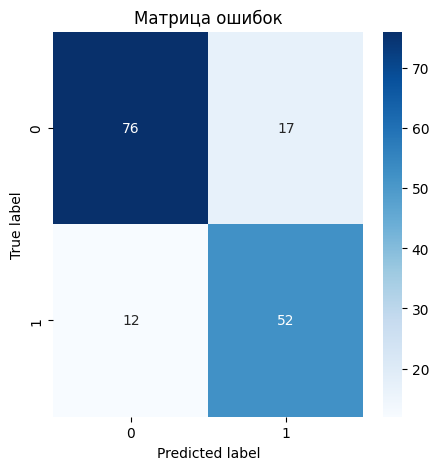


Classification Report:
                 precision    recall  f1-score   support

   appendicitis       0.86      0.82      0.84        93
no appendicitis       0.75      0.81      0.78        64

       accuracy                           0.82       157
      macro avg       0.81      0.81      0.81       157
   weighted avg       0.82      0.82      0.82       157







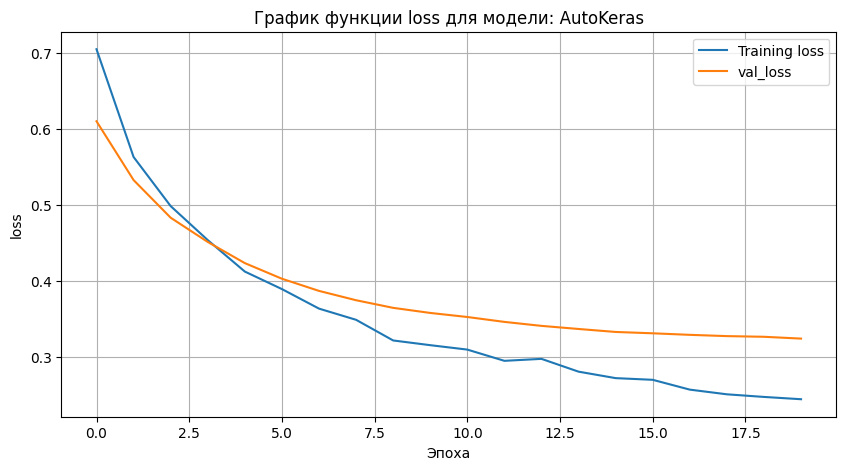

In [ ]:
# Функция для визуализации графика обучения нейронной сети
def show_drawings(first_line='loss', second_line='val_loss', history=model_NN, name_m='AutoKeras'):
        print("\n\n\n")  # Просто вывод пустых строк для отделения графика от остального вывода

        # Создаём область для графика размером 10 на 5 дюймов
        plt.figure(figsize=(10, 5))

        # Строим линию первой метрики из истории обучения — по умолчанию это 'loss' (ошибка на обучающей выборке)
        plt.plot(history.history[first_line], label=f'Training {first_line}')

        # Строим линию второй метрики — по умолчанию это 'val_loss' (ошибка на валидационной выборке)
        plt.plot(history.history[second_line], label=second_line)

        # Заголовок графика: автоматически подставляется имя функции потерь и имя модели
        plt.title(f'График функции {first_line} для модели: {name_m}')

        # Подписи осей
        plt.xlabel('Эпоха')       # X — количество эпох (циклов обучения)
        plt.ylabel(first_line)    # Y — значение функции потерь

        # Отображение легенды (названий линий)
        plt.legend()

        # Включение сетки для удобства визуального анализа
        plt.grid(True)

        # Показать график на экране
        plt.show()

# Вызываем функцию, которая рассчитывает метрики качества модели
# Здесь: y_predict — предсказания модели
#        name — название модели, которое будет отображаться в результатах
calculate_mecrics(y_predict=pred_NN_classes, name='AutoKeras')


show_drawings()

# Нейронная сеть, собранная вручную

In [ ]:
# Создаём модель нейросети в виде списка слоёв

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor='val_loss',          # следим за значением метрики val_loss на валидации
    mode='min',                  # чем меньше метрика — тем лучше
    filepath="manual_NN_model_best.keras",  # куда сохранять файл
    save_best_only=True          # сохранять только, если модель стала лучше
)


model_NN_manual = Sequential([

    InputLayer(shape=(35,)),              # Входной слой: принимает 35 числовых признаков (размерность входных данных)
    Dense(128, activation='relu', kernel_initializer='glorot_uniform', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),         # Первый полносвязный слой: 128 нейронов, каждый соединён с каждым входом
    Dense(512, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),
    Dense(256, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),                       # Второй скрытый слой: 256 нейрона
    Dense(128, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),                       # Третий скрытый слой: 128 нейрона
    Dense(64, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),
    Dense(32, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),
    Dense(16, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),
    Dense(8, activation='relu', kernel_initializer='he_normal', use_bias=True, kernel_regularizer=L1L2(l1=1e-3, l2=1e-4)),
    Dense(1, activation='sigmoid')  # Выходной слой: 1 нейрон с сигмоидной активацией — нужен для бинарной классификации (0 или 1)
])

# Компиляция модели: настройка параметров обучения
model_NN_manual.compile(
    optimizer='adam',                      # Оптимизатор Adam — адаптивно настраивает шаг обучения
    loss='binary_crossentropy',           # Функция потерь — бинарная кросс-энтропия для задачи "да/нет"
    metrics=['accuracy']                  # Будем отслеживать точность предсказаний (accuracy)
)

# Обучение модели
history = model_NN_manual.fit(
    scaled_X_train,     # входные данные для обучения (предварительно масштабированные признаки)
    y_train_encoded,    # правильные ответы (классы 0 и 1)
    validation_data=(scaled_X_test, y_test_encoded),  # валидационная выборка (для контроля качества)
    epochs=30,          # число полных проходов по тренировочным данным (эпох)
    batch_size=32,      # количество примеров, обрабатываемых за один шаг обучения
    verbose=2,          # 1 = печать прогресса по эпохам (0 — без вывода, 2 — полный)
    class_weight=class_weights_dict,  # Веса классов, чтобы сбалансировать обучение (если классы представлены неравномерно)
    callbacks=[model_checkpoint]
)

Epoch 1/30
20/20 - 24s - 1s/step - accuracy: 0.6560 - loss: 16.8855 - val_accuracy: 0.8025 - val_loss: 15.1317
Epoch 2/30
20/20 - 0s - 11ms/step - accuracy: 0.8384 - loss: 13.8789 - val_accuracy: 0.8217 - val_loss: 12.4929
Epoch 3/30
20/20 - 0s - 11ms/step - accuracy: 0.8800 - loss: 11.3952 - val_accuracy: 0.8153 - val_loss: 10.3651
Epoch 4/30
20/20 - 0s - 11ms/step - accuracy: 0.8912 - loss: 9.3272 - val_accuracy: 0.8408 - val_loss: 8.4393
Epoch 5/30
20/20 - 0s - 11ms/step - accuracy: 0.9168 - loss: 7.6213 - val_accuracy: 0.8471 - val_loss: 6.9673
Epoch 6/30
20/20 - 0s - 12ms/step - accuracy: 0.9120 - loss: 6.2794 - val_accuracy: 0.8344 - val_loss: 5.8263
Epoch 7/30
20/20 - 0s - 11ms/step - accuracy: 0.9232 - loss: 5.2241 - val_accuracy: 0.8217 - val_loss: 4.8521
Epoch 8/30
20/20 - 0s - 11ms/step - accuracy: 0.9312 - loss: 4.3746 - val_accuracy: 0.8153 - val_loss: 4.2775
Epoch 9/30
20/20 - 0s - 11ms/step - accuracy: 0.9312 - loss: 3.7274 - val_accuracy: 0.8280 - val_loss: 3.5892
Epoch

In [ ]:
model_NN_manual = tf.keras.models.load_model("manual_NN_model_best.keras", compile=False)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step



 METRICS
Accuracy:  0.8089171974522293
F1 Score:  0.8078466146875304
Precision: 0.8078621927462954
Recall: 0.8089171974522293

Confusion Matrix:


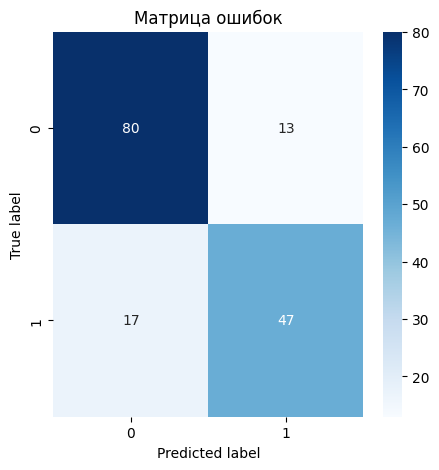


Classification Report:
                 precision    recall  f1-score   support

   appendicitis       0.82      0.86      0.84        93
no appendicitis       0.78      0.73      0.76        64

       accuracy                           0.81       157
      macro avg       0.80      0.80      0.80       157
   weighted avg       0.81      0.81      0.81       157



In [ ]:
# Выполняем предсказание модели нейросети на отмасштабированных тестовых данных (scaled_X_test)
# Метод .predict() возвращает вероятности принадлежности к каждому классу (например, вероятность "аппендицит")
pred_NN_manual = model_NN_manual.predict(scaled_X_test)

# Преобразуем вероятности в конкретные классы
# np.where() проверяет: если вероятность > 0.5 — присваиваем класс, соответствующий второму значению в списке индексов (обычно 1)
# иначе — присваиваем класс, соответствующий первому значению в списке индексов (обычно 0)
# unique_diagnosis.index — это список всех уникальных классов, отсортированных по метке
pred_NN__manual_classes = np.where(pred_NN_manual > 0.5,
                                   unique_diagnosis.index[1],  # если вероятность > 0.5 → класс 1
                                   unique_diagnosis.index[0])  # иначе → класс 0

# Вызываем функцию calculate_mecrics(), чтобы рассчитать метрики качества модели
# y_predict — это предсказанные классы
# name — это метка для идентификации модели в отчёте (например, 'Neurological_Network_Manual')
calculate_mecrics(y_predict=pred_NN__manual_classes, name='Neurological_Network_Manual')


Топология сети Neurological_Network_Manual


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,889 (960.50 KB)

 Trainable params: 245,889 (960.50 KB)

 Non-trainable params: 0 (0.00 B)

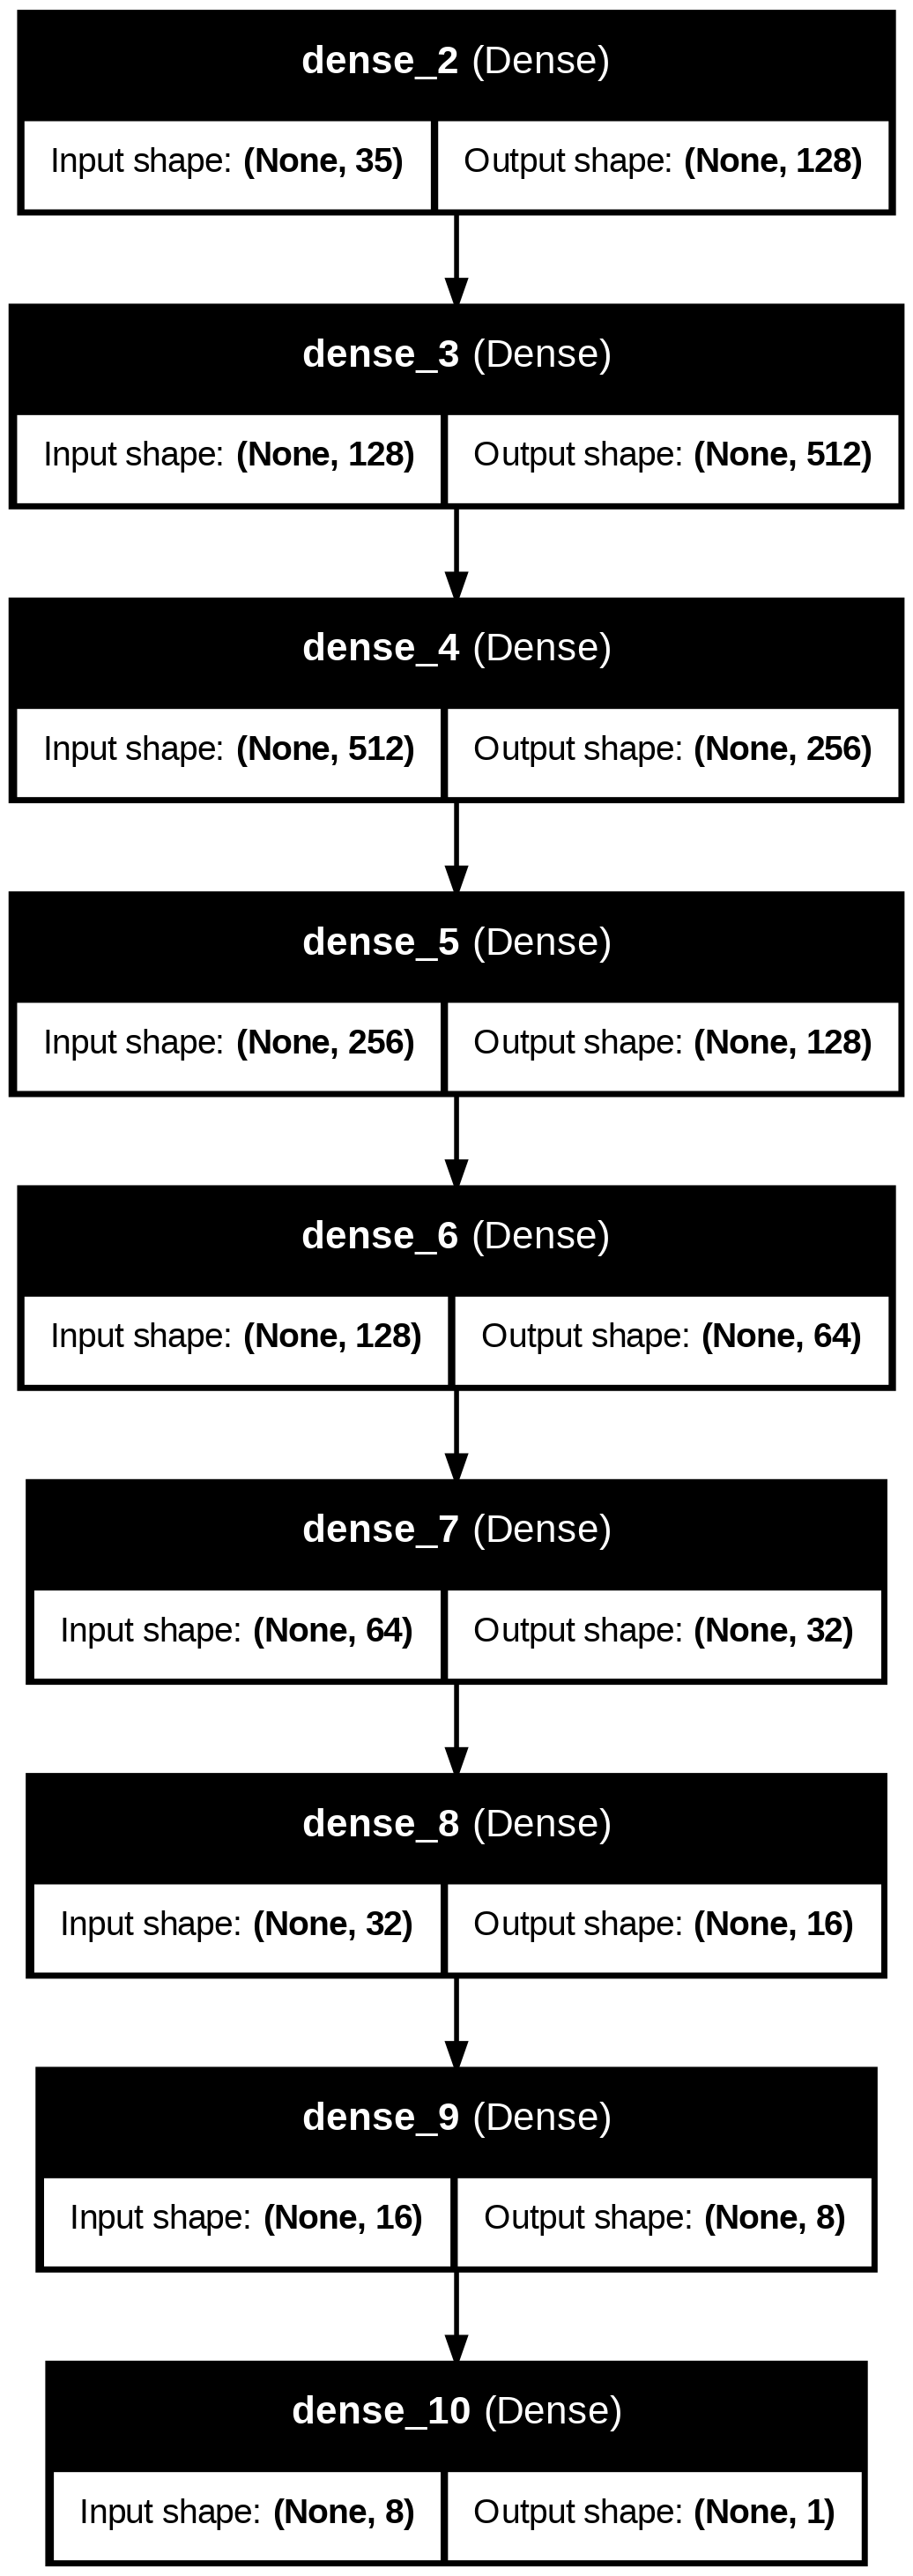

In [ ]:
show_topology(model_NN_manual, 'Neurological_Network_Manual')

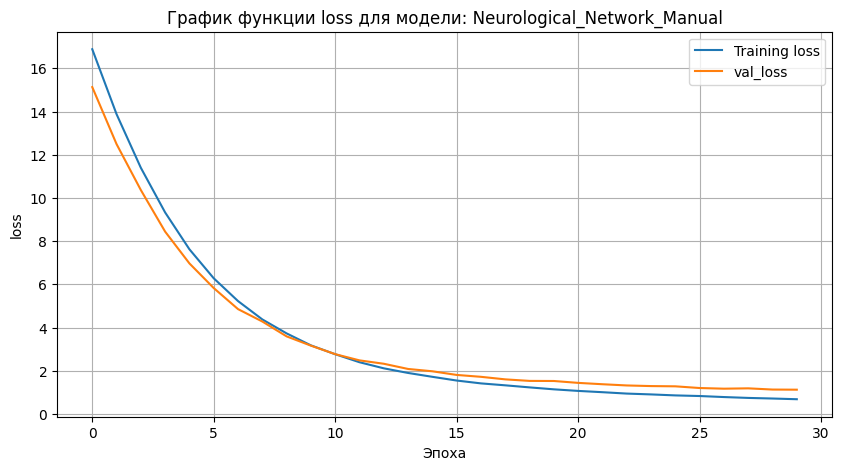

In [ ]:
show_drawings(history=history, name_m='Neurological_Network_Manual')

# Модель на основании RandomForestClassifier




 METRICS
Accuracy:  0.8662420382165605
F1 Score:  0.8660730736768534
Precision: 0.8659763765469146
Recall: 0.8662420382165605

Confusion Matrix:


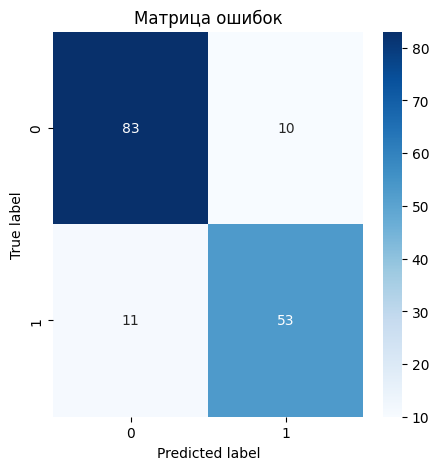


Classification Report:
                 precision    recall  f1-score   support

   appendicitis       0.88      0.89      0.89        93
no appendicitis       0.84      0.83      0.83        64

       accuracy                           0.87       157
      macro avg       0.86      0.86      0.86       157
   weighted avg       0.87      0.87      0.87       157



In [ ]:

# Создание модели случайного леса
# n_estimators=100 — количество деревьев в "лесу", чем больше — тем стабильнее предсказание
# random_state=42 — фиксирует случайность, чтобы результат всегда был одинаков при повторном запуске
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающей выборке
# scaled_X_train — это признаки (входные данные), отмасштабированные с помощью StandardScaler
# scaled_y_train — это целевые метки (например, 0 и 1), к которым модель учится привязывать входы
model_rf.fit(scaled_X_train, scaled_y_train)

# Делаем предсказания на тестовых данных
# scaled_X_test — входы из тестовой выборки
# y_pred_rf — вектор предсказаний модели (набор классов, например, 0 или 1)
y_pred_rf = model_rf.predict(scaled_X_test)

# Преобразуем предсказания в финальные классы, учитывая порог > 0.5
# np.where(...) — если предсказание больше 0.5, выбирается индекс "болен" (например, 1), иначе — индекс "здоров" (например, 0)
# unique_diagnosis.index[...] — это индексы, соответствующие названиям диагнозов (например, 0 для 'no appendicitis', 1 для 'appendicitis')
pred_RF_classes = np.where(y_pred_rf > 0.5, unique_diagnosis.index[1], unique_diagnosis.index[0])

# Оцениваем метрики качества модели
# calculate_mecrics(...) — пользовательская функция
# она должна рассчитывать и выводить accuracy, f1-score и другие показатели
# y_predict — это предсказанные классы
# name — название модели, для отображения в отчёте или графике
calculate_mecrics(y_predict=pred_RF_classes, name='RandomForestClassifier')




In [ ]:
print(name_model)

catboost


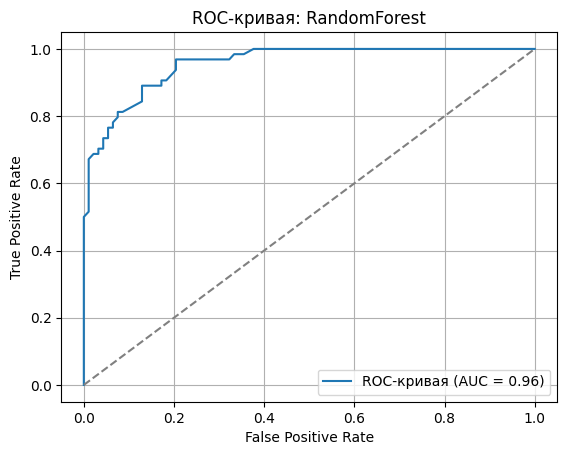

In [ ]:
def show_roc(model=model_rf):
      # Строим ROC-кривую для оценки качества бинарной классификации модели Random Forest

      # Получаем вероятности положительного класса (обычно класс "1") для каждого наблюдения из тестовой выборки
      # model — обученная модель RandomForestClassifier
      # scaled_X_test — предварительно масштабированные (нормализованные) признаки из тестовой выборки
      # .predict_proba(...) возвращает двумерный массив, где:
      # [:, 0] — вероятность класса "0"
      # [:, 1] — вероятность класса "1" (нас интересует она — поэтому [:, 1])
      y_proba = model.predict_proba(scaled_X_test)[:, 1]

      # Строим ROC-кривую (Receiver Operating Characteristic)
      # roc_curve(...) вычисляет:
      # - fpr: False Positive Rate (ошибочные срабатывания)
      # - tpr: True Positive Rate (чувствительность, доля правильно предсказанных "1")
      # - thresholds: пороги, при которых эти значения рассчитаны (мы его не используем — поэтому подчёркивание _)
      # scaled_y_test — истинные значения классов для тестовой выборки
      fpr, tpr, _ = roc_curve(scaled_y_test, y_proba)

      # auc(...) вычисляет площадь под ROC-кривой (AUC — Area Under Curve)
      # Чем ближе AUC к 1.0, тем лучше модель. Случайная модель имеет AUC около 0.5
      roc_auc = auc(fpr, tpr)

      # Визуализация ROC-кривой
      plt.figure()  # создаём новое пустое поле для графика
      plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')  # основной график ROC-кривой с подписями
      plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # диагональ (случайная модель), пунктирная линия
      plt.xlabel('False Positive Rate')  # подпись оси X
      plt.ylabel('True Positive Rate')   # подпись оси Y
      plt.title('ROC-кривая: RandomForest')  # заголовок графика
      plt.legend()  # показываем легенду
      plt.grid(True)  # включаем сетку
      plt.show()  # отображаем график


show_roc(model=model_rf)

# Модель на основании Support Vector Machine (SVM)

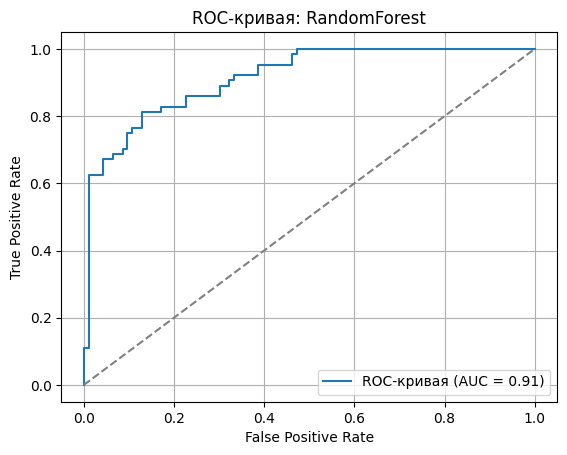

In [ ]:
# Создаём модель SVM (метод опорных векторов) для классификации
# Параметры:
# - kernel='rbf': используем радиальную базисную функцию (гауссово ядро), хорошо подходит для нелинейных границ между классами
# - probability=True: включаем возможность предсказания вероятностей (нужно, если используешь predict_proba)
# - random_state=42: фиксируем "случайность" для воспроизводимости результатов
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

# Обучаем модель на тренировочных данных
# - scaled_X_train: матрица признаков (уже отмасштабированных StandardScaler'ом)
# - y_train_encoded: целевые переменные (классы в виде чисел: 0, 1, 2, ...)
model_svm.fit(scaled_X_train, y_train_encoded)
# Выполняем предсказание классов на тестовой выборке с использованием обученной модели SVM (model_svm)
# scaled_X_test — это предварительно масштабированные признаки тестовой выборки
y_pred_svm = model_svm.predict(scaled_X_test)

# Преобразуем вероятности (или значения решения) в итоговые классы
# np.where(...) — векторная замена if-else:
# если значение больше 0.5, выбираем класс с индексом 1, иначе — класс с индексом 0
# unique_diagnosis.index — это индексы возможных значений диагноза (например, [0, 1])
# Таким образом, предсказания переводятся в метки классов
pred_SVM_classes = np.where(y_pred_svm > 0.5, unique_diagnosis.index[1], unique_diagnosis.index[0])

# Отображаем график ROC-кривой для оценки качества бинарного классификатора
# model=model_svm — передаём обученную модель
# show_roc — пользовательская функция (не встроенная в Python), которая строит ROC-кривую
show_roc(model=model_svm)




 METRICS
Accuracy:  0.8280254777070064
F1 Score:  0.825490882291182
Precision: 0.8287611975884736
Recall: 0.8280254777070064

Confusion Matrix:


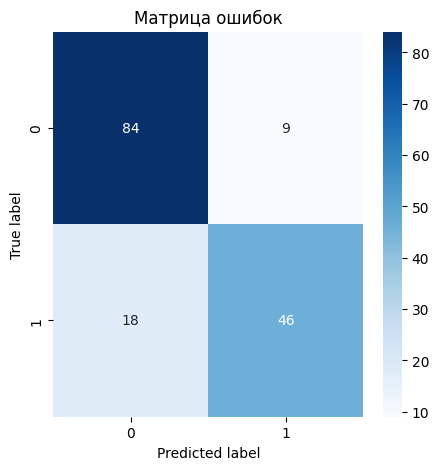


Classification Report:
                 precision    recall  f1-score   support

   appendicitis       0.82      0.90      0.86        93
no appendicitis       0.84      0.72      0.77        64

       accuracy                           0.83       157
      macro avg       0.83      0.81      0.82       157
   weighted avg       0.83      0.83      0.83       157



In [ ]:
calculate_mecrics(y_predict=pred_SVM_classes, name='SVM')

In [ ]:
print(f'Самая лучшая модель {name_model} с лучшей метрикой F1_score = {best_f1_score}')

Самая лучшая модель catboost с лучшей метрикой F1_score = 0.8784891315337174


# Визуализация важности признаков

Самая лучшая оказалась модель CatBoost по метрике f1 score

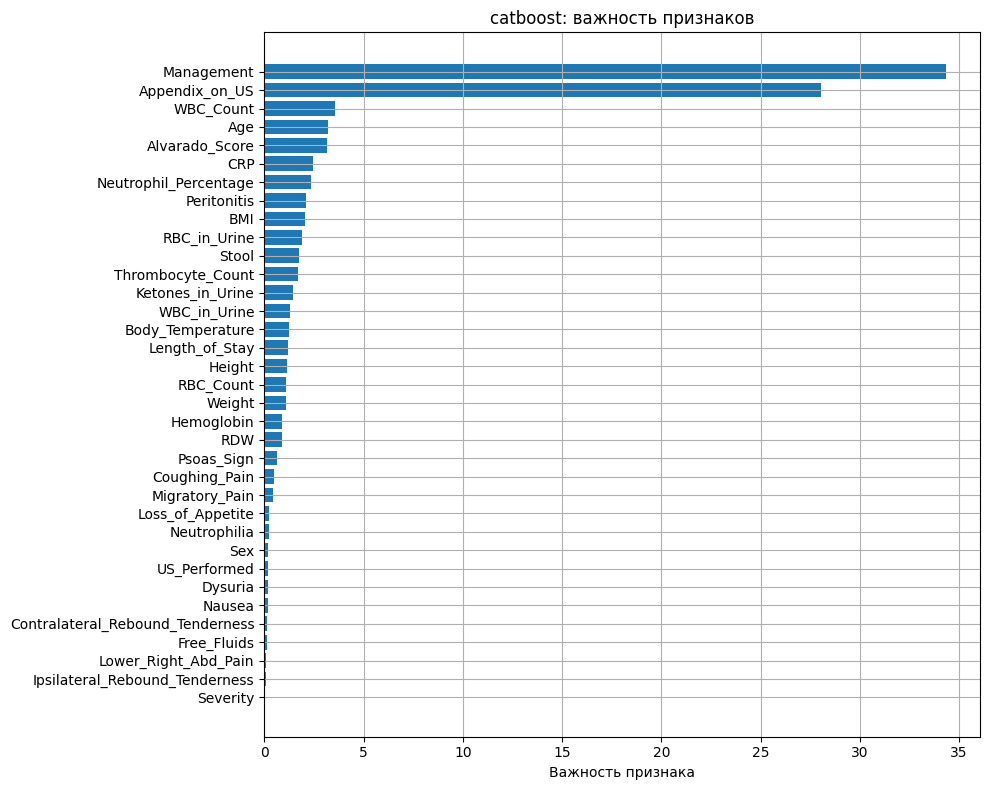

In [ ]:

#best_model           # сюда запишется лучшая модель
#best_f1_score          # стартовое значение F1 (наименьшее возможное)
#name_model          # сюда запишется имя модели


# Получаем список важностей признаков из модели
# Эта команда извлекает численные значения, которые показывают,
# насколько каждый признак (столбец в X_train) повлиял на итоговое решение модели.
# Чем выше значение, тем важнее признак для классификации.
feature_importances = best_model.get_feature_importance()


# Получаем список имён признаков (должны быть те же, что в X_train)
# Здесь мы берём названия всех признаков, которые использовались для обучения модели.
# Они нужны, чтобы сопоставить важности с их названиями.
feature_names = X_train.columns

# Собираем в DataFrame для удобства сортировки и визуализации
# Создаём таблицу, где в первом столбце названия признаков, а во втором — их важность.
# Затем сортируем эту таблицу по убыванию важности, чтобы самые значимые признаки были вверху.
importance_df = pd.DataFrame({
    'Feature': feature_names,          # Название признака
    'Importance': feature_importances  # Его важность
}).sort_values(by='Importance', ascending=False)

# Визуализация: горизонтальный barplot
# Здесь мы создаём горизонтальную столбчатую диаграмму (barh),
# которая показывает, какие признаки важны для модели и насколько.
plt.figure(figsize=(10, 8))  # Размер графика (ширина, высота в дюймах)
plt.barh(importance_df['Feature'], importance_df['Importance'])  # Признаки по оси Y, важность по X
plt.gca().invert_yaxis()  # Меняем порядок оси Y, чтобы самый важный признак был сверху
plt.xlabel("Важность признака")  # Подпись оси X
plt.title(f"{name_model}: важность признаков")  # Заголовок графика
plt.grid(True)  # Включаем сетку на фоне графика
plt.tight_layout()  # Автоматически подгоняет размер элементов на графике
plt.show()  # Показываем итоговый график


#Общий вывод по работе:

В ходе выполнения проекта была реализована полноценная система машинного обучения для диагностики острого аппендицита у детей на основе клинических данных из открытого медицинского датасета Regensburg Pediatric Appendicitis.

На первом этапе была проведена очистка и предварительная обработка данных: удалены признаки с высоким уровнем пропусков, оставшиеся пробелы заполнены статистически обоснованными методами (медианой для числовых, модой для категориальных признаков). Целевая переменная была преобразована в числовой формат, а признаки масштабированы для корректной работы алгоритмов.

В качестве основной модели был выбран CatBoostClassifier — мощный алгоритм градиентного бустинга, хорошо справляющийся с табличными и категориальными данными. Дополнительно были протестированы логистическая регрессия и случайный лес. Все модели оценивались с помощью стандартных метрик качества: accuracy, precision, recall и F1-score. Результаты показали высокую точность и сбалансированность предсказаний.
В работе испытывались и сравнивалмсь пять моделей: CatBoostClassifier, AutoKeras NN, neurological network, RandomForestClassifier, SVM. Модели сравнивались по меторике F1-score. В итоге наилучшей оказалась модель CatBoostClassifier с F1_score = 0.87848.

Работа завершилась построением графиков функции потерь и подробным анализом результатов. При необходимости, подход легко масштабируется, автоматизируется  и может быть использован в виде готового программного инструмента в клинической практике.

Также была построена визуализация важности признаков, что позволило выявить ключевые медицинские факторы, влияющие на постановку диагноза. Это делает модель не только точной, но и интерпретируемой для врачей.